# Showcase YOLO

YOLOv8 is a state-of-the-art computer vision model built by Ultralytics. The YOLOv8 model contains out-of-the-box support for object detection, classification, and segmentation tasks, accessible through a Python package as well as a command line interface.

This example showcases YOLOv8 default models on a detection application.

## Setup

In [2]:
!pip -q install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.2 MB/s eta 0:00:00


## Import Libraries

In [87]:
from ultralytics import YOLO
import os
import shutil
from urllib.request import urlretrieve
import cv2
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import random

## User Inputs

In [39]:
# Datasets folder
# Folder where all the datasets will be saved
datasets_folder = "datasets"

# Image URL to download and apply detection
# If getting error, use http instead of https, or use different image
image_url = "https://i0.wp.com/onpasture.com/wp-content/uploads/2017/08/cows-and-chickens.jpg?fit=898%2C585&ssl=1"

## Code

In [76]:
# Load a pretrained YOLOv8 model
# YOLOv8 Extra Large is the most accurate, but slowest among the five YOLO models
# The models are trained with COCO dataset, which include 80 classes
model = YOLO("models/yolov8x.pt")

In [77]:
# Create new folder (if does not exist) to store the downloaded dataset
if not os.path.exists(datasets_folder):
  os.mkdir(datasets_folder)

In [78]:
# Download image for detection
image_path = os.path.join(datasets_folder, "example-image.png")
urlretrieve(image_url, image_path)

('datasets/example-image.png', <http.client.HTTPMessage at 0x7b801e54b6a0>)

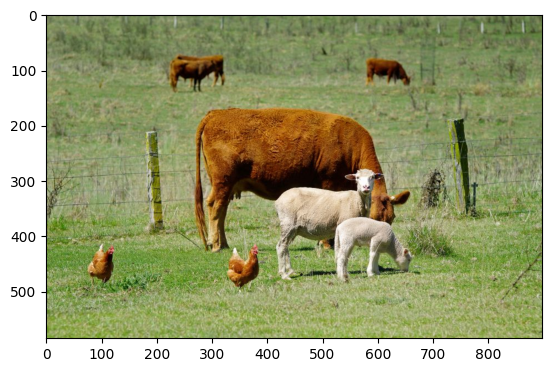

In [79]:
# Open and show image
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [83]:
# Run detection
results = model(source=image_bgr, show=False, conf=0.2, save=True)


0: 448x640 2 birds, 2 sheeps, 3 cows, 3831.5ms
Speed: 4.0ms preprocess, 3831.5ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict6


In [93]:
# Extract bounding boxes
boxes = results[0].boxes.xyxy.tolist()
classes = results[0].boxes.cls.tolist()
names = results[0].names
confidences = results[0].boxes.conf.tolist()

unique_classes = set(classes)
rand_color = ["#"+''.join([random.choice("0123456789ABCDEF") for j in range(6)]) for i in range(len(unique_classes))]
class_colors = {}
i=0
for u_clas in unique_classes:
    class_colors[u_clas] = rand_color[i]
    i += 1

bbox_info = {}
bbox_num = 1
for box, clas, conf in zip(boxes, classes, confidences):
    # Box: x1, y1, x2, y2
    bbox_key = "bbox_" + str(bbox_num)
    name = names[int(clas)]
    bbox_info[bbox_key] = [name, class_colors[int(clas)], round(conf,2), box]
    bbox_num += 1

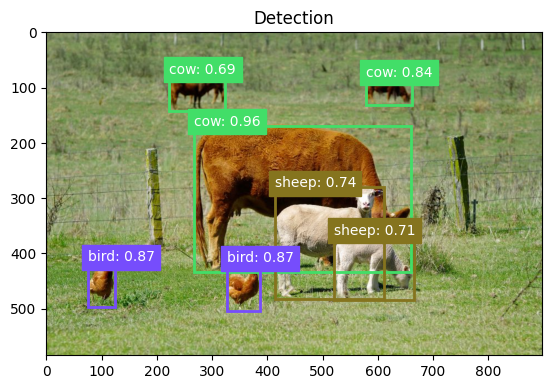

In [94]:
# Plot results
fig, ax = plt.subplots()
ax.imshow(image_rgb)
for bbox in bbox_info.keys():
    color = bbox_info[bbox][1]
    xy = (bbox_info[bbox][-1][0], bbox_info[bbox][-1][1])
    width = bbox_info[bbox][-1][2] - bbox_info[bbox][-1][0]
    height = bbox_info[bbox][-1][-1] - bbox_info[bbox][-1][1]
    label_text = bbox_info[bbox][0] + ": " + str(bbox_info[bbox][2])
    draw_bbox = patches.Rectangle(xy, width, height, linewidth=2, edgecolor=color, facecolor="none")
    ax.add_patch(draw_bbox)
    ax.text(xy[0], xy[1], s=label_text, fontsize=10, color="white", backgroundcolor=color)
plt.title("Detection")
plt.show()